<a href="https://colab.research.google.com/github/HemaGarima/Mathematics-for-ML-DS/blob/master/Calculus_W_1_Differentiation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def f(x):
  return x**2

In [2]:
print(f(3))

9


In [3]:
def dfdx(x):
  return 2*x

print(dfdx(3))

6


In [4]:
import numpy as np
x_array = np.array([1,2,3])
print("x : \n" , x_array)
print("f(x) = x**2: \n" , f(x_array))
print("f'(x) = 2x: \n" , dfdx(x_array))

x : 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]
f'(x) = 2x: 
 [2 4 6]


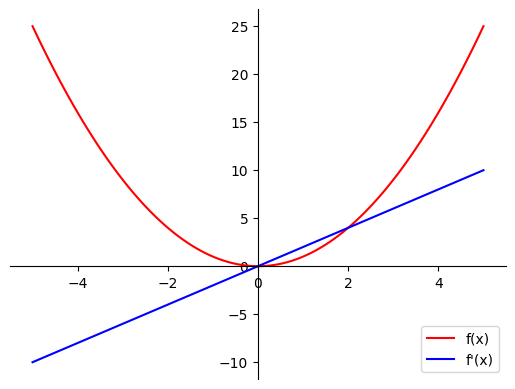

In [5]:
from logging import NOTSET
import matplotlib.pyplot as plt
%matplotlib inline

def plot_f1_and_f2(f1 , f2 = None , x_min = -5 , x_max = 5 , label1 = "f(x)" , label2 = "f'(x)"):
  x = np.linspace(x_min , x_max , 100)
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  plt.plot(x,f1(x),'r',label = label1)
  if not f2 is None:
    if isinstance(f2 , np.ndarray):
      plt.plot(x,f2 , 'bo' , markersize = 3 , label = label2)
    else:
      plt.plot(x , f2(x) , 'b' , label = label2)
  plt.legend()

  plt.show()

plot_f1_and_f2(f , dfdx)

In [6]:
import math
math.sqrt(18)

4.242640687119285

In [7]:
from sympy import *
sqrt(18)

3*sqrt(2)

In [8]:
N(sqrt(18) , 8)

4.2426407

In [9]:
x,y = symbols('x y')
expr = 2 * x**2 - x*y
expr

2*x**2 - x*y

In [10]:
expr_manip = x*(expr + x*y + x**3)
expr_manip

x*(x**3 + 2*x**2)

In [11]:
expand(expr_manip)

x**4 + 2*x**3

In [12]:
factor(expr_manip)

x**3*(x + 2)

In [13]:
expr.evalf(subs = {x:-1 , y:2})

4.00000000000000

In [14]:
f_symb = x**2
f_symb.evalf(subs = {x : 3})

9.00000000000000

In [15]:
print(x_array)

[1 2 3]


In [16]:
try:
  f_symb(x_array)
except TypeError as err:
  print(err)

'Pow' object is not callable


In [17]:
from sympy.utilities.lambdify import lambdify
f_symb_numpy = lambdify(x , f_symb , 'numpy')

In [18]:
print("x : \n" , x_array)
print("f(x) = x**2: \n" , f_symb_numpy(x_array))

x : 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]


In [19]:
diff(x**3 , x)

3*x**2

In [20]:
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x) , x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

In [21]:
dfdx_symb = diff(f_symb , x)
dfdx_symb_numpy = lambdify(x , dfdx_symb , 'numpy')

In [22]:
print("x : \n" , x_array)
print("f'(x) = 2x: \n" , dfdx_symb_numpy(x_array))

x : 
 [1 2 3]
f'(x) = 2x: 
 [2 4 6]


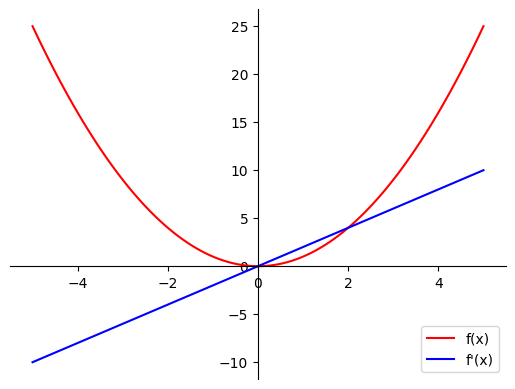

In [23]:
plot_f1_and_f2(f_symb_numpy , dfdx_symb_numpy)

In [24]:
dfdx_abs = diff(abs(x) , x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

In [25]:
dfdx_abs.evalf(subs = {x:-2})

-Subs(Derivative(re(x), x), x, -2)

In [28]:
dfdx_abs_numpy = lambdify(x, dfdx_abs,'numpy')

try:
    dfdx_abs_numpy(np.array([1, -2, 0]))
except NameError as err:
    print(err)

PrintMethodNotImplementedError: Unsupported by <class 'sympy.printing.numpy.NumPyPrinter'>: <class 'sympy.core.function.Derivative'>
Set the printer option 'strict' to False in order to generate partially printed code.